# About Yulu:

Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations including metro stations, bus stands, office spaces, residential areas, corporate offices, etc to make those first and last miles smooth, affordable, and convenient!

# About the Dataset:

The dataset has the following columns:
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
  * 1: Clear, Few clouds, partly cloudy, partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light
       Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered      

# Business Problem:

The company wants to determine the variables that are significant in predicting the demand for shared electric cycles in the Indian market
and how well these variables describe the electric cycle demands



Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway,kruskal,chi2_contingency,shapiro,levene
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [2]:
df=pd.read_csv("yulu.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
# Converting 'season','holiday','workingday','weather' columns from int to categorical
df['season']=df['season'].astype('category')
df['holiday']=df['holiday'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weather']=df['weather'].astype('category')

# Converting 'datetime' column from object to pandas datetime object
df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Statistical Summary for numeric columns
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
# Statistical Summary for categorical columns
df.describe(include=['category'])

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


Observations:
* There are 10886 rows and 12 columns
* There are no missing values in the dataset
* There are no duplicate values in the dataset

# Analysis of the distributions of numeric and categorical variables

For Numerical Columns

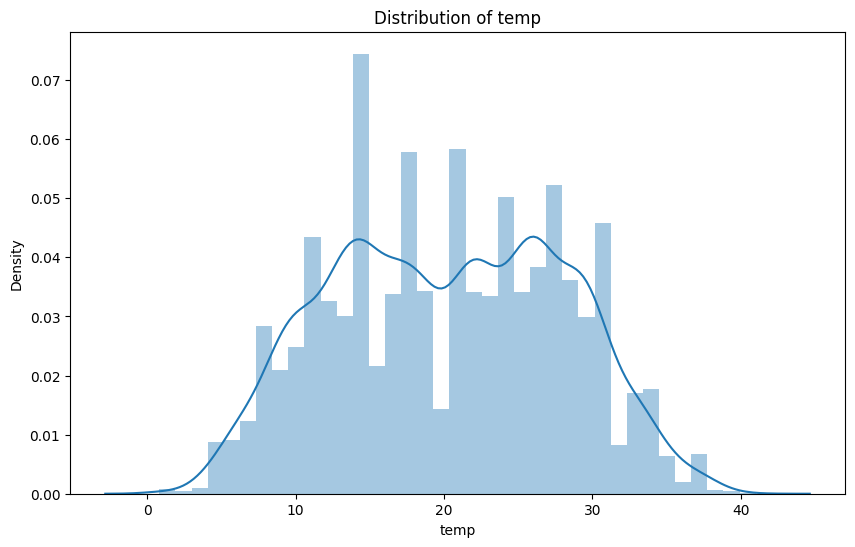

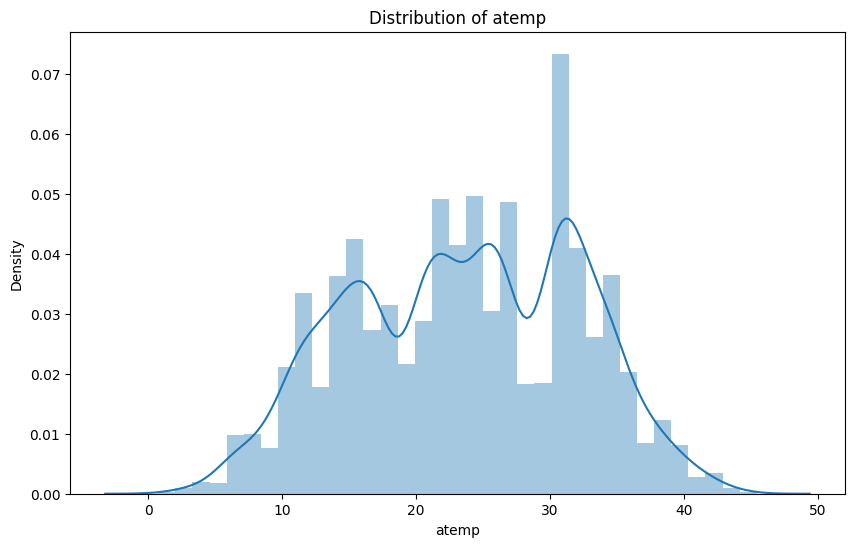

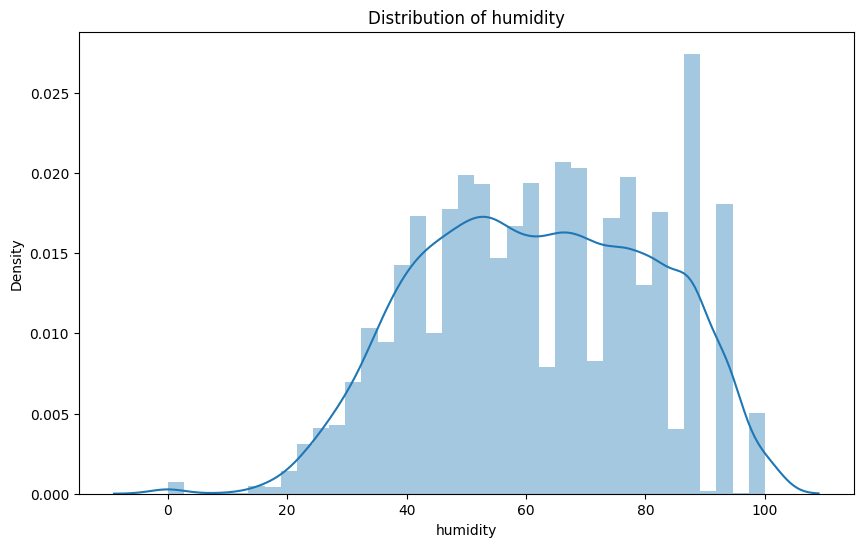

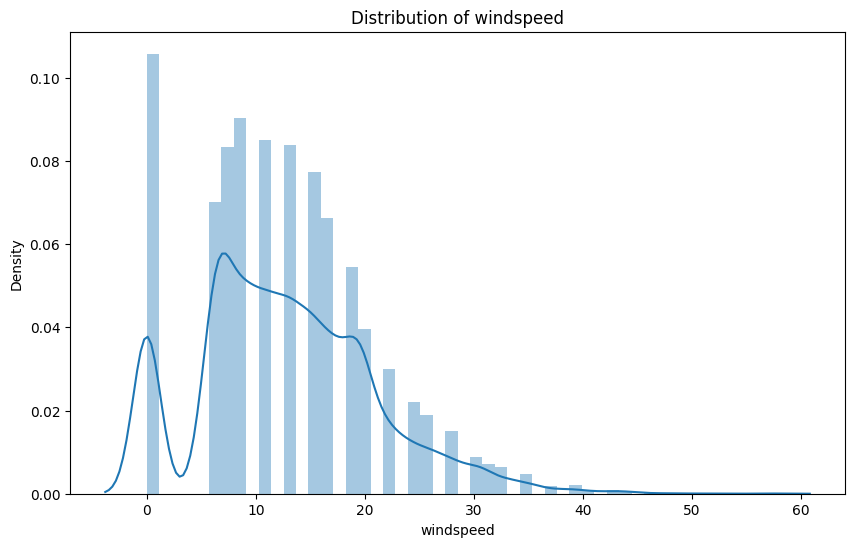

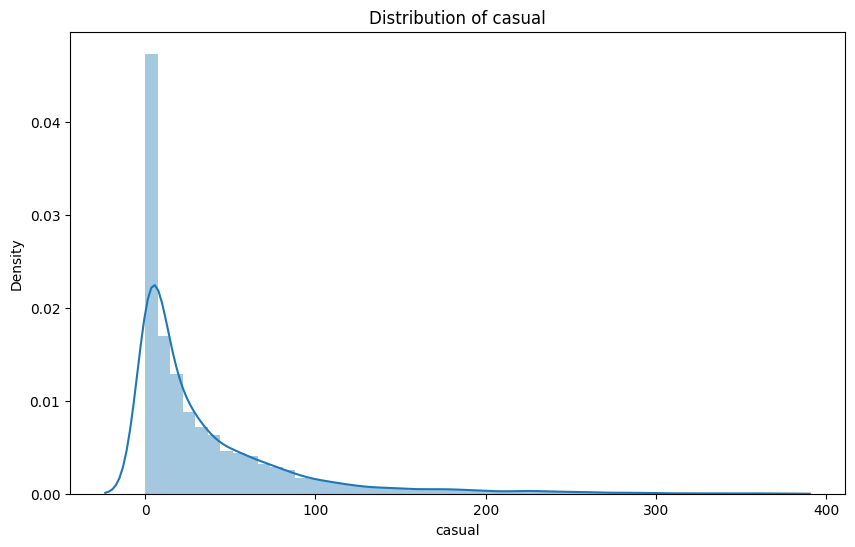

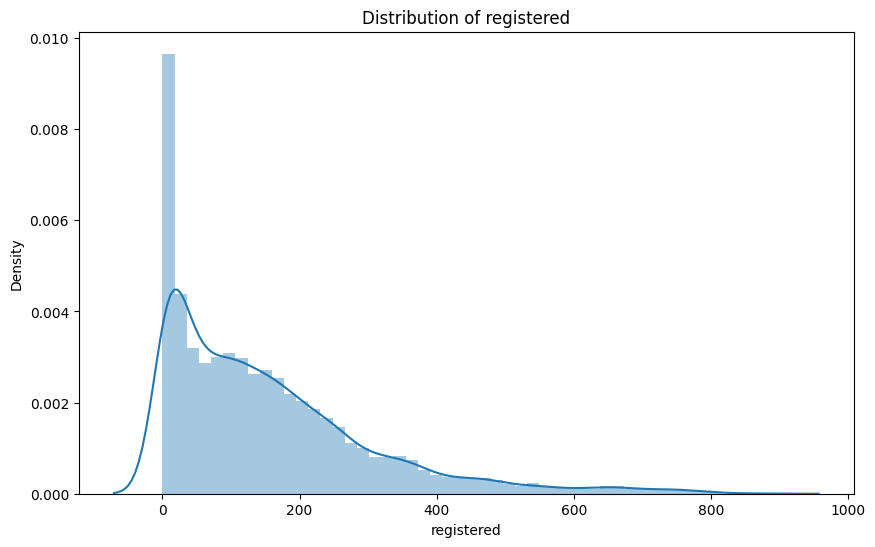

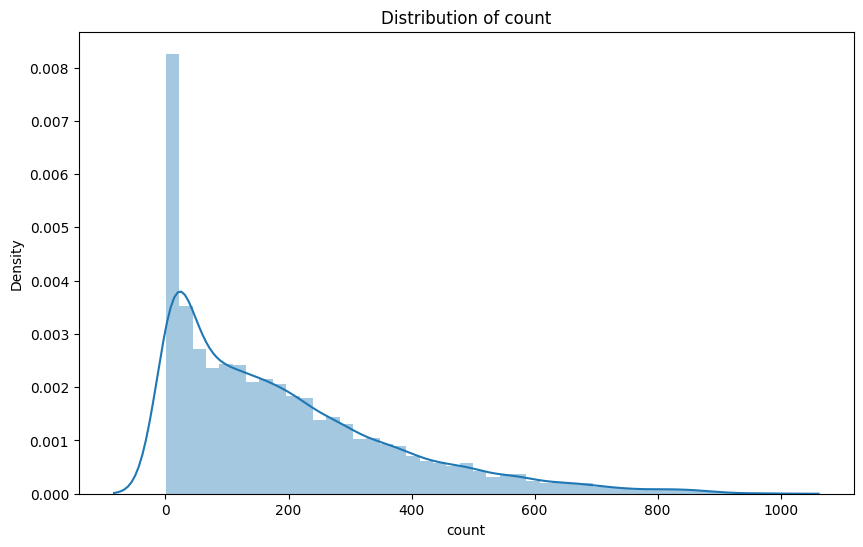

In [12]:
numeric_cols=['temp','atemp','humidity','windspeed','casual','registered','count']
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()
    print()

For Categorical Columns

In [13]:
categorical_cols=['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    print(f"Value Counts of {col}")
    print(df[col].value_counts())
    print()

Value Counts of season
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Value Counts of holiday
0    10575
1      311
Name: holiday, dtype: int64

Value Counts of workingday
1    7412
0    3474
Name: workingday, dtype: int64

Value Counts of weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64



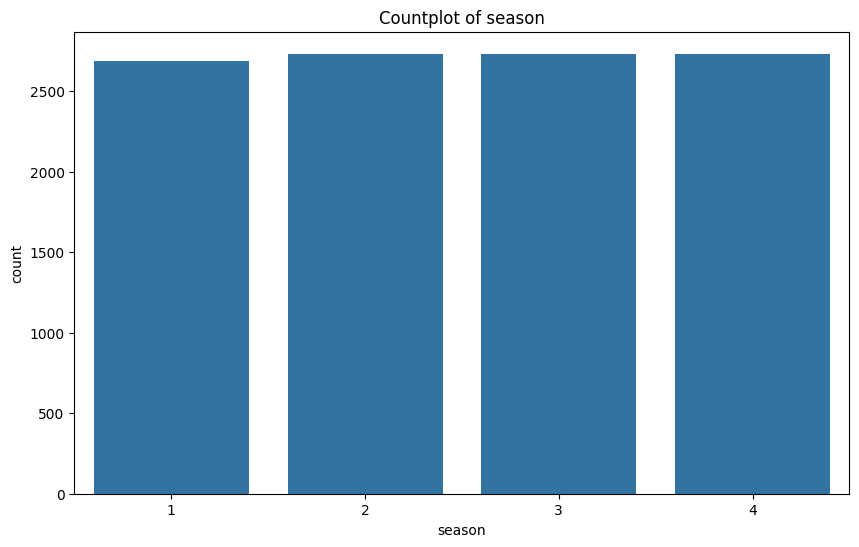

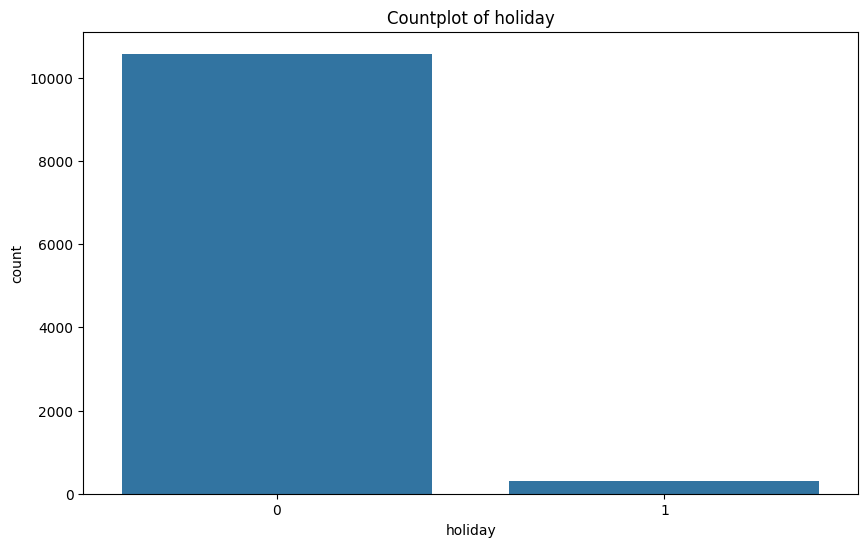

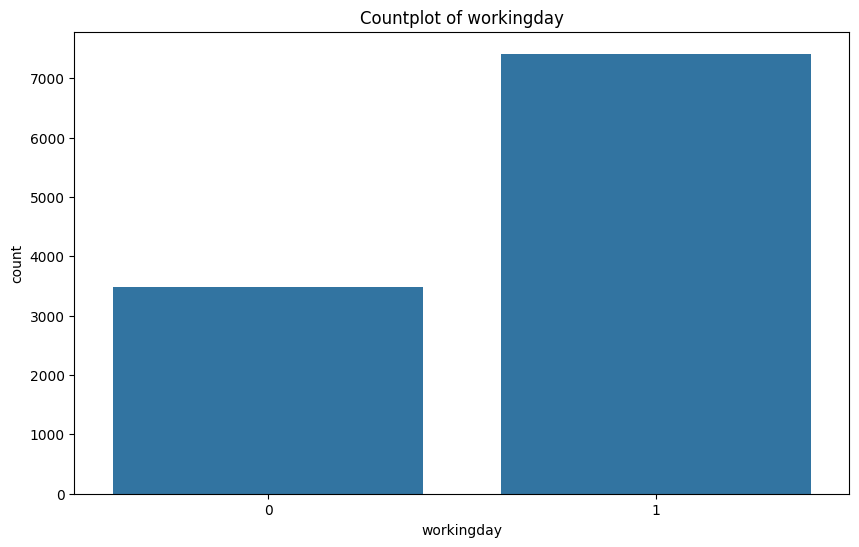

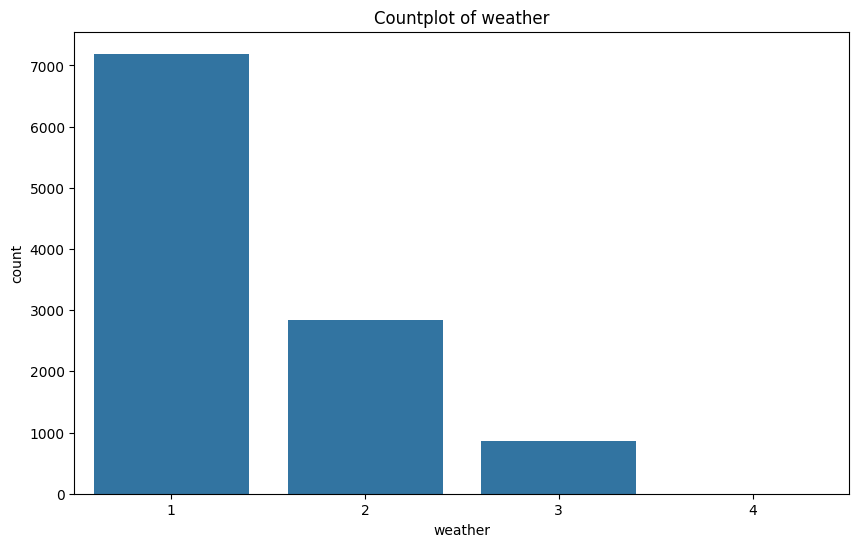

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=col)
    plt.title(f"Countplot of {col}")
    plt.show()
    print()

# Detection of outliers

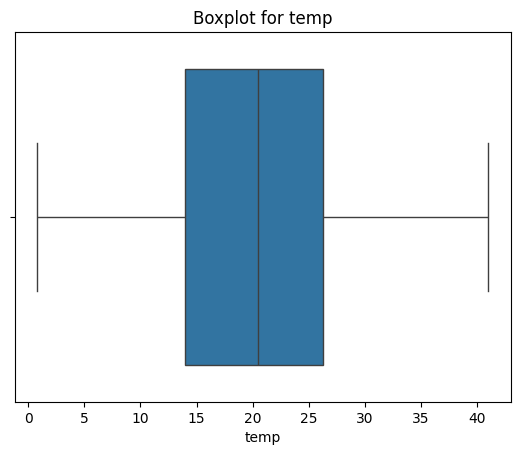


There are 0 outliers in temp column

----------------------------------------------------------------------


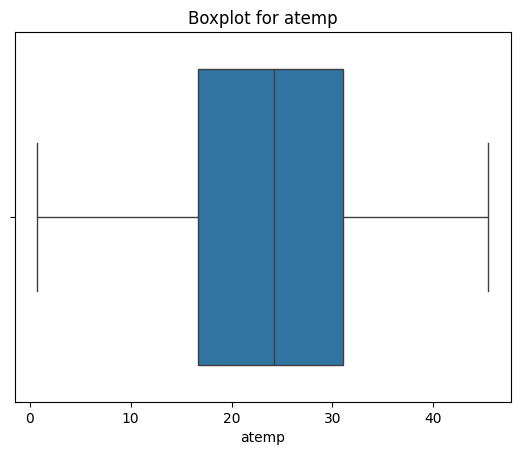


There are 0 outliers in atemp column

----------------------------------------------------------------------


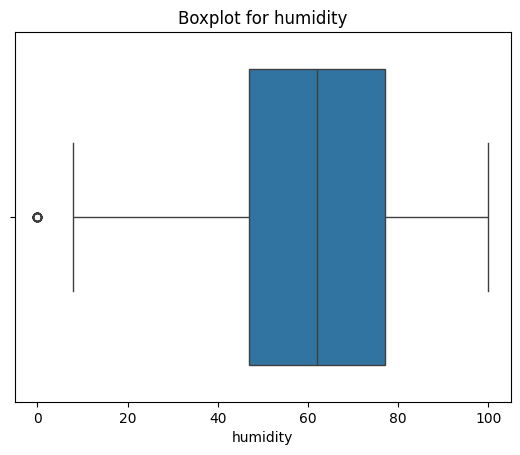


There are 22 outliers in humidity column

----------------------------------------------------------------------


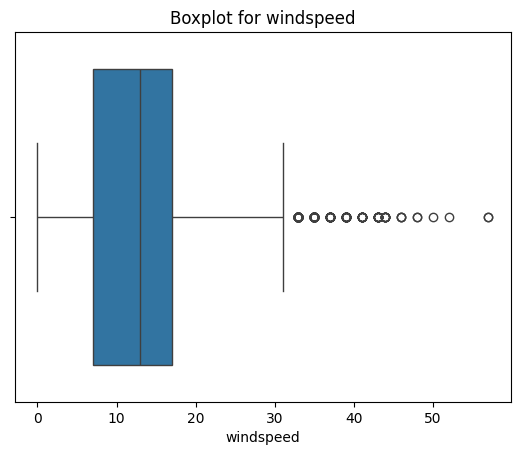


There are 227 outliers in windspeed column

----------------------------------------------------------------------


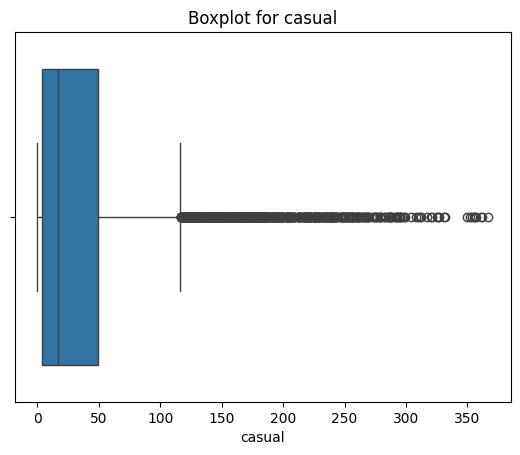


There are 749 outliers in casual column

----------------------------------------------------------------------


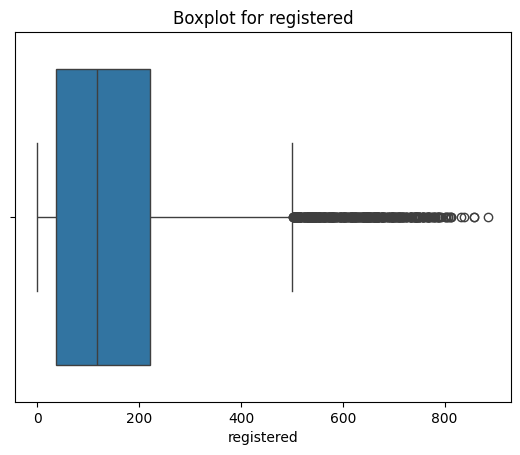


There are 423 outliers in registered column

----------------------------------------------------------------------


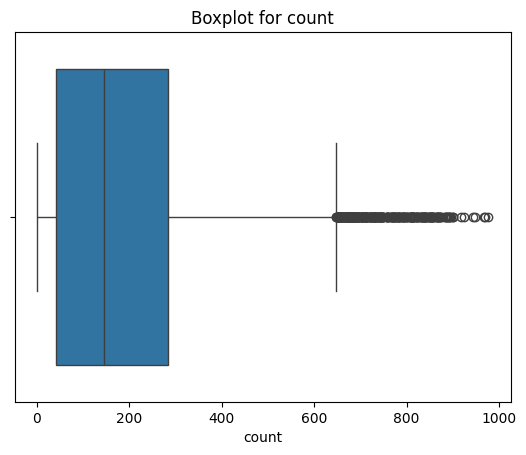


There are 300 outliers in count column

----------------------------------------------------------------------


In [15]:
# Checking outliers for each numeric column

for col in numeric_cols:
    # Boxplot for each column
    sns.boxplot(data=df,x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()
    print()

    # Computing IQR for each column
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)
    IQR=q3-q1
    upper_limit=q3 + (1.5*IQR)
    lower_limit=q1 - (1.5*IQR)

    # The values lesser than the lower limit and the values greater than the upper limit are outliers
    outliers_of_col= df[(df[col]<lower_limit)|(df[col]>upper_limit)]
    k=len(outliers_of_col)
    print(f"There are {k} outliers in {col} column")
    print()
    print("-------"*10)

Clipping the data between the 5 percentile and 95 percentile for the  columns having outliers

In [16]:
df['humidity']=np.clip(df['humidity'],np.percentile(df['humidity'],5),np.percentile(df['humidity'],95))
df['windspeed']=np.clip(df['windspeed'],np.percentile(df['windspeed'],5),np.percentile(df['windspeed'],95))
df['casual']=np.clip(df['casual'],np.percentile(df['casual'],5),np.percentile(df['casual'],95))
df['registered']=np.clip(df['registered'],np.percentile(df['registered'],5),np.percentile(df['registered'],95))
df['count']=np.clip(df['count'],np.percentile(df['count'],5),np.percentile(df['count'],95))

### Correlation between numerical variables

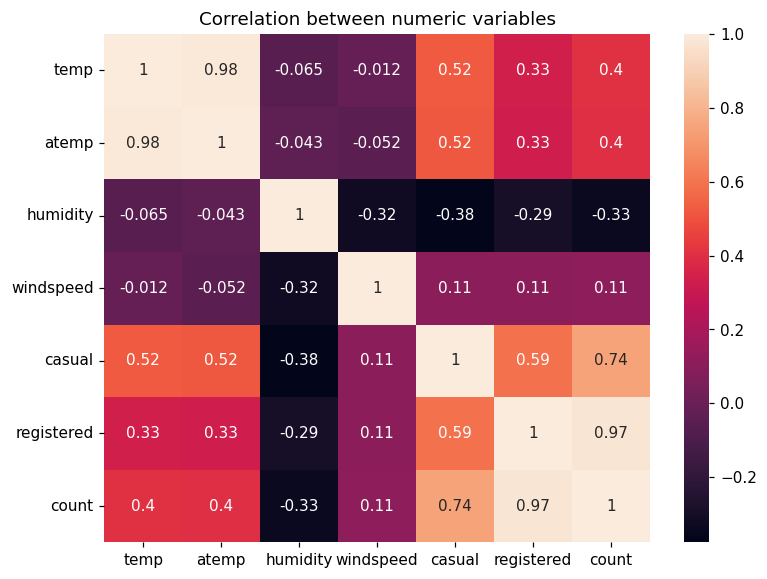

In [17]:
plt.figure(figsize=(8,6),dpi=110)
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between numeric variables")
plt.show()

Observations:


* Both 'temp' and 'atemp' columns are weakly positively correlated with 'count' column
* The column 'humidity' is weakly negatively correlated with the 'count' column
* The column 'windspeed' is very weakly positively correlated with the 'count' column
* The column 'casual' is strongly positively correlated with the 'count' column
* The column 'registered' is very highly positively correlated with the 'count' column
* The columns 'temp' and 'atemp' are very highly positively correlated



Since, 'temp' and 'atemp' are very highly positively correlated and both have equal correlation with the target column, we shall remove 'atemp' column

In [18]:
df.drop('atemp',axis=1,inplace=True)

# To verify if there is any significant difference between the no. of bike rides on Weekdays and Weekends


In [19]:
# Extracting day names from datetime column
df['day_name']=df['datetime'].dt.day_name()

In [20]:
def is_weekend(day):

    """
    This function takes a day as an input and returns
    "Weekend" if the day is either Saturday or Sunday and
    "Weekday" otherwise

    """
    if day in ["Saturday","Sunday"]:
        return "Weekend"
    else:
        return "Weekday"

df['day_type']=df['day_name'].apply(is_weekend)

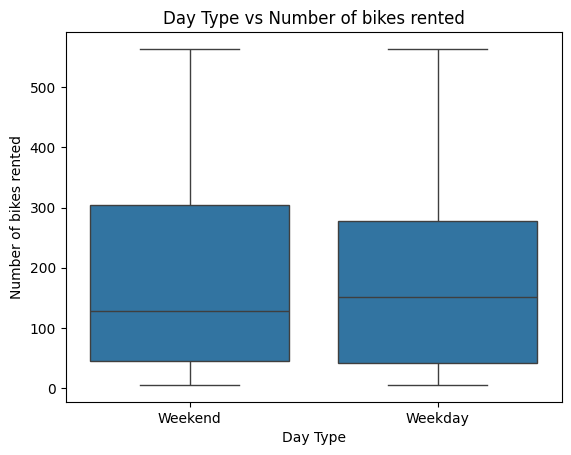

In [21]:
# Boxplot of day_type vs total number of rental bikes
sns.boxplot(data=df,x='day_type',y='count')
plt.title("Day Type vs Number of bikes rented")
plt.xlabel("Day Type")
plt.ylabel("Number of bikes rented")
plt.show()

We shall apply 2 sample t-test to verify if the difference between bikes rented on weekdays and weekends is statistically significant

In [22]:
weekday_rides=df[df['day_type']=='Weekday']['count']
weekend_rides=df[df['day_type']=='Weekend']['count']

In [23]:
weekday_rides.mean()

185.5695973067461

In [24]:
weekend_rides.mean()

185.98095162820107

Null and Alternate hypothesis


H0 : Number of bikes rented on weekdays and weekends are same (mu1=mu2)

Ha : Number of bikes rented on weekdays and weekends are different (mu1!=mu2)




Performing two tailed independent sample t-test

In [25]:
t_stat,p_value=ttest_ind(weekday_rides,weekend_rides,alternative='two-sided')
print(f"p_value = {p_value} \n")

alpha = 0.05 # Significance level

if p_value<alpha:
    print("Reject H0.")
    print("Number of bikes rented on weekdays and weekends are different.")
else:
    print("Fail to Reject H0.")
    print("Number of bikes rented on weekdays and weekends are same.")

p_value = 0.9057644251136538 

Fail to Reject H0.
Number of bikes rented on weekdays and weekends are same.


Observation:

There is no significant difference in the number of bikes rented on weekdays and weekends.

Recommendations:

*  During weekdays, lot of people travel to their offices. So more offers, referral programs and loyality points should be offered to these people to maximize the number of bike rides in weekdays. Also, more Yulu zones need to be started especially near metro stations, railway stations, bus stations and tech parks to provide faster connectivity for the customers.
* Since the difference in bike rides during weekdays and weekends is insignificant, the service hours can be extended throughout the week to accomodate the customers who travel outside the peak hours.
* Also,the bikes,maintenance team members and other resources can be evenly distributed throughout the week.



# To verify if the demand of bicycles on rent is the same for different weather conditions

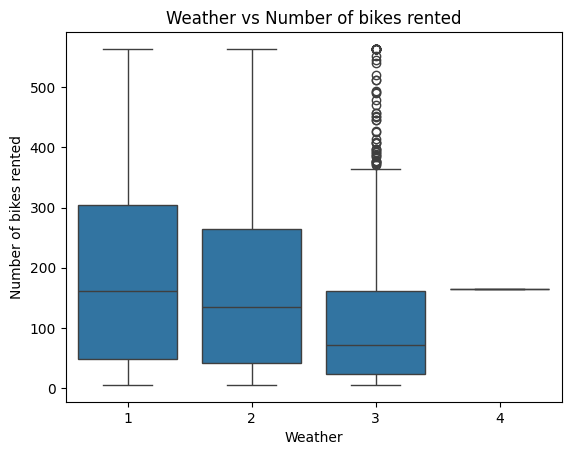

In [26]:
# Boxplot of weather vs total number of rental bikes
sns.boxplot(data=df,x='weather',y='count')
plt.title("Weather vs Number of bikes rented")
plt.xlabel("Weather")
plt.ylabel("Number of bikes rented")
plt.show()

In [27]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,day_name,day_type
5631,2012-01-09 18:00:00,1,0,1,4,8.2,86,6.0032,6,158,164.0,Monday,Weekday


Observation:


We have only datapoint for weather condition '4' i.e.,Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, which is very extreme and naturally bike rides will be very rare during this period. So we shall ignore weather condition '4' and consider only weather conditions '1','2' and '3'




We shall apply one way ANOVA test to verify if the number of bicycles rented is same for different weather conditions

In [28]:
weather_1=df[df['weather']==1]['count']
weather_2=df[df['weather']==2]['count']
weather_3=df[df['weather']==3]['count']

Before performing the test, we need to verify the assumptions of ANOVA

1) Normality

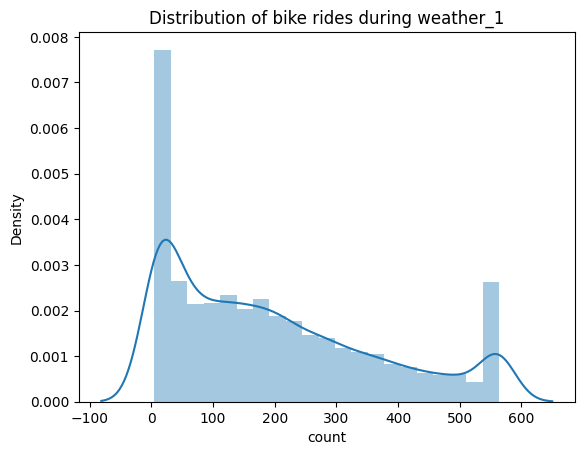

In [29]:
# Distribution of number of bikes rented during weather condition 1
sns.distplot(weather_1)
plt.title("Distribution of bike rides during weather_1")
plt.show()

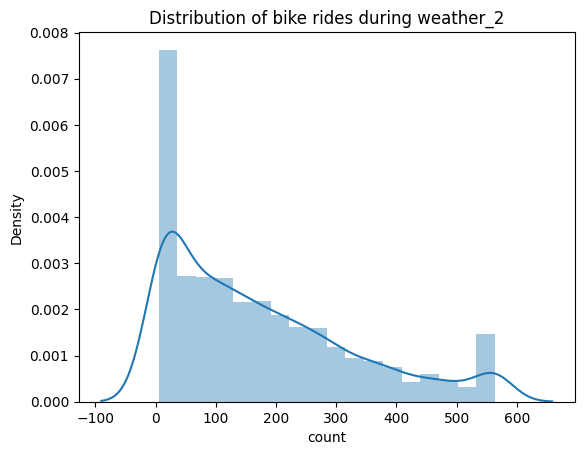

In [30]:
# Distribution of number of bikes rented during weather condition 2
sns.distplot(weather_2)
plt.title("Distribution of bike rides during weather_2")
plt.show()

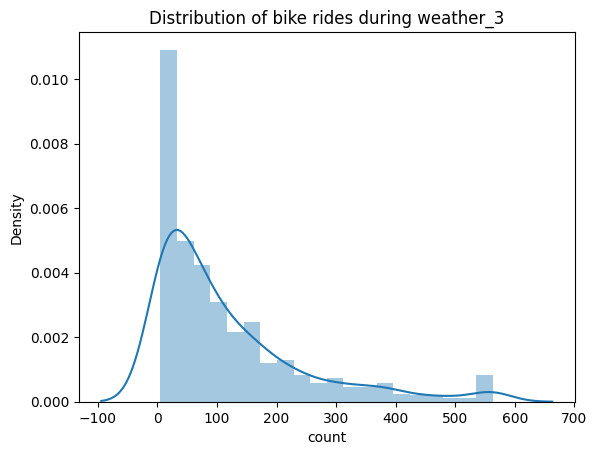

In [31]:
# Distribution of number of bikes rented during weather condition 3
sns.distplot(weather_3)
plt.title("Distribution of bike rides during weather_3")
plt.show()

Observation: Distribution of bike rides during all 3 weather conditions seem to be right skewed

In [32]:
print("Skewness of weather_1:",weather_1.skew())
print("Skewness of weather_2:",weather_2.skew())
print("Skewness of weather_3:",weather_3.skew())

Skewness of weather_1: 0.736322461193618
Skewness of weather_2: 0.9296845618420533
Skewness of weather_3: 1.7013286534371677


In [33]:
print("Kurtosis of weather_1:",weather_1.kurt())
print("Kurtosis of weather_2:",weather_2.kurt())
print("Kurtosis of weather_3:",weather_3.kurt())

Kurtosis of weather_1: -0.525921604740589
Kurtosis of weather_2: 0.010387794528335714
Kurtosis of weather_3: 2.6489280099549397


We shall use Q-Q plot to check for normality

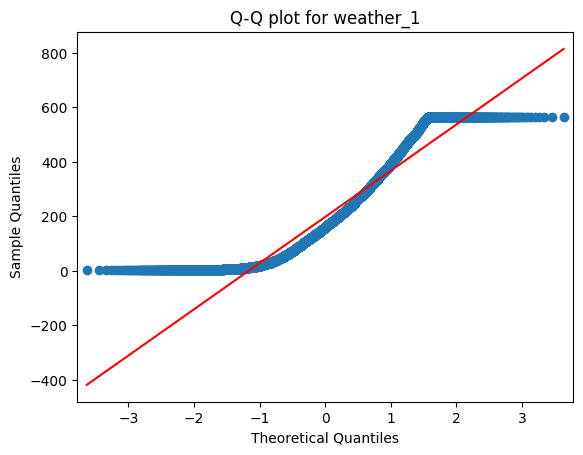

In [34]:
qqplot(weather_1, line="s")
plt.title("Q-Q plot for weather_1")
plt.show()

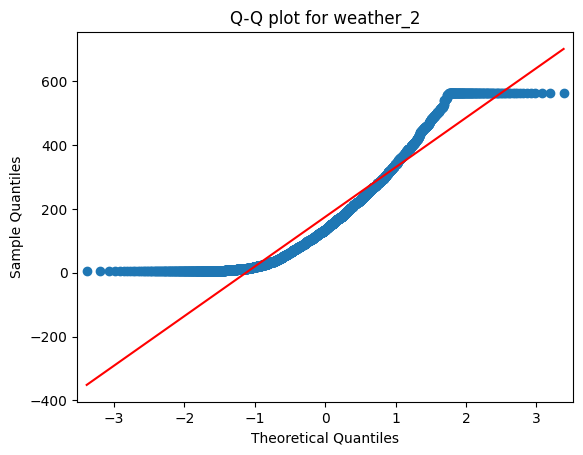

In [35]:
qqplot(weather_2, line="s")
plt.title("Q-Q plot for weather_2")
plt.show()

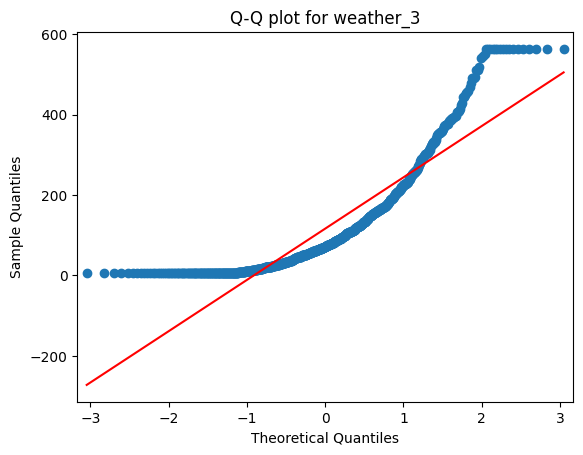

In [36]:
qqplot(weather_3, line="s")
plt.title("Q-Q plot for weather_3")
plt.show()

Observation: Number of bike rides during all 3 weather conditions seem to be not normally distributed

We shall perform Shapiro-Wilk's test to verify the normality of the groups

In [37]:
# For weather group 1

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(weather_1)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 0.0
Reject H0
Data is not Gaussian


In [38]:
# For weather group 2

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(weather_2)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 1.0249377227764577e-40
Reject H0
Data is not Gaussian


In [39]:
# For weather group 3

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(weather_3)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 2.300214398655157e-31
Reject H0
Data is not Gaussian


Observation: Normality test fails for all 3 weather conditions

2) Equality of Variance


We shall perform Levene's test to check for equality of variance

In [40]:
# H0: The variances between the groups are equal
# Ha: The variances between the groups are different
test_stat, p_value = levene(weather_1, weather_2,weather_3)

print("p_value=", p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
 print('Reject H0')
 print('The variances between the groups are different')
else:
 print('Fail to reject H0')
 print('The variances between the groups are same')

p_value= 1.910132820873076e-41
Reject H0
The variances between the groups are different


Since, the assumptions of ANOVA failed, we shall apply Kruskal-Wallis test

Null and Alternate Hypothesis

H0 : The medians of the number of bikes rented are the same for all three weather conditions

Ha : At least one of the medians of the number of bikes rented is different among the three weather conditions

Performing Kruskal-Wallis test

In [41]:
test_stat, p_value = kruskal(weather_1, weather_2, weather_3)

print(f"p_value={p_value}\n")

alpha = 0.05 # Significance level

if p_value < alpha:
   print("Reject H0.")
   print("At least one of the medians of the number of bikes rented is different among the three weather conditions.")
else:
   print("Fail to reject H0.")
   print("The medians of the number of bikes rented are the same for all three weather conditions.")

p_value=3.479472652318814e-45

Reject H0.
At least one of the medians of the number of bikes rented is different among the three weather conditions.


Since, there is a significant difference among the number of bikes rented, we shall perform pairwise t-test for each pair of weather conditions (weather_1 vs weather_2, weather_2 vs weather_3, weather_1 vs weather_3)

In [43]:
weather_1.mean(),weather_2.mean(),weather_3.mean()

(198.28695077864293, 174.6980416372618, 116.50029103608847)

weather_1 vs weather_2

 H0 : The number of bikes rented during weather condition 1 is not greater than number of bikes rented during weather condition 2 (mu1<=mu2)

 Ha : The number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 2 (mu1>mu2)


In [44]:
# Right tailed independent t-test
t_stat, p_value = ttest_ind(weather_1,weather_2,alternative="greater")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 2.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 2.")

p_value =7.211523491893073e-11

Reject the null hypothesis.
The number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 2.


weather_2 vs weather_3

H0 : The number of bikes rented during weather condition 2 is not greater than number of bikes rented during weather condition 3 (mu1<=mu2)

Ha : The number of bikes rented during weather condition 2 is greater than number of bikes rented during weather condition 3 (mu1>mu2)

In [45]:
# Right tailed independent t-test
t_stat, p_value = ttest_ind(weather_2,weather_3,alternative="greater")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during weather condition 2 is greater than number of bikes rented during weather condition 3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during weather condition 2 is greater than number of bikes rented during weather condition 3.")

p_value =1.5160483832327175e-23

Reject the null hypothesis.
The number of bikes rented during weather condition 2 is greater than number of bikes rented during weather condition 3.


weather_1 vs weather_3

H0 : The number of bikes rented during weather condition 1 is not greater than number of bikes rented during weather condition 3 (mu1<=mu2)

Ha : The number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 3 (mu1>mu2)

In [46]:
# Right tailed independent t-test
t_stat, p_value = ttest_ind(weather_1,weather_3,alternative="greater")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 3.")

p_value =2.0573465213669817e-42

Reject the null hypothesis.
The number of bikes rented during weather condition 1 is greater than number of bikes rented during weather condition 3.


Observations:
* There is a significant difference among the number of bikes rented during different weather conditions.
* The number of bikes rented during clear weather conditions is greater than the number of bikes rented during misty weather conditions.
* The number of bikes rented during misty weather conditions is greater than the number of bikes rented during light rains.
* The number of bikes rented during clear weather conditions is greater than the number of bikes rented during light rains.
* Based on the above observations, we can conclude that the number of bikes rented is highest when weather is clear and lowest during rainy  conditions.

Recommendations:
* Since, most number of bikes are rented during clear weather conditions, more discounts and incentives need to be provided to increase the rental rate during this time period.
* During cloudy weather conditions, Yulu bikes should be promoted as the safest and quickest way to reach the destination without the traffic hassle.
* During light rains or thunderstorms, there will be huge demand for autos and cabs and accordingly, prices will be hiked. Consider, providing lower pricing for the rides on areas with better visibilty and low risk of slippery even though the rental rate will be low during this time period.

# To verify if the demand of bicycles on rent is the same for different seasons

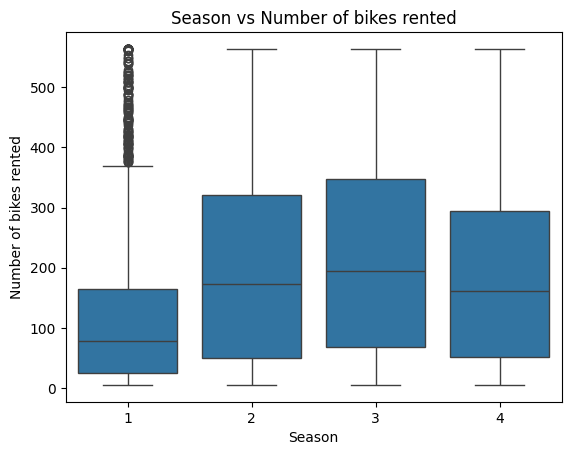

In [47]:
# Boxplot of season vs total number of rental bikes
sns.boxplot(data=df,x='season',y='count')
plt.title("Season vs Number of bikes rented")
plt.xlabel("Season")
plt.ylabel("Number of bikes rented")
plt.show()

We shall apply one way ANOVA test to verify if the number of bicycles rented is same for different seasons

In [48]:
season_1=df[df['season']==1]['count']
season_2=df[df['season']==2]['count']
season_3=df[df['season']==3]['count']
season_4=df[df['season']==4]['count']

Before performing the test, we need to verify the assumptions of ANOVA

1) Normality

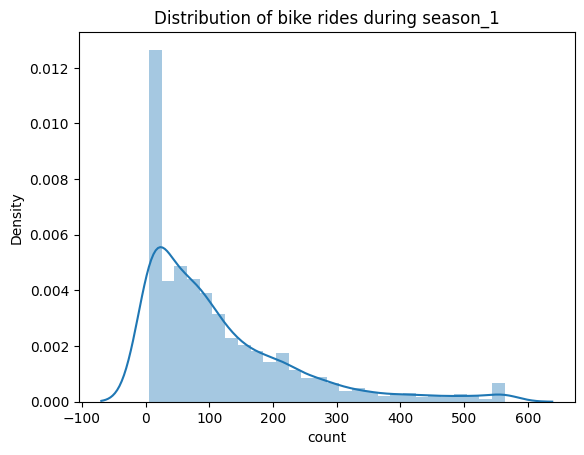

In [49]:
# Distribution of number of bikes rented during season 1
sns.distplot(season_1)
plt.title("Distribution of bike rides during season_1")
plt.show()

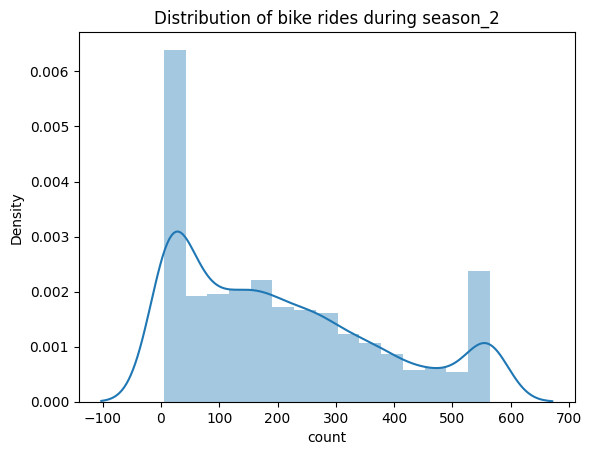

In [50]:
# Distribution of number of bikes rented during season 2
sns.distplot(season_2)
plt.title("Distribution of bike rides during season_2")
plt.show()

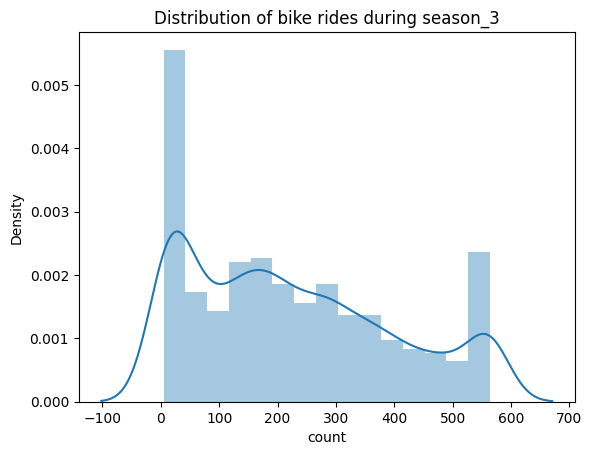

In [51]:
# Distribution of number of bikes rented during season 3
sns.distplot(season_3)
plt.title("Distribution of bike rides during season_3")
plt.show()

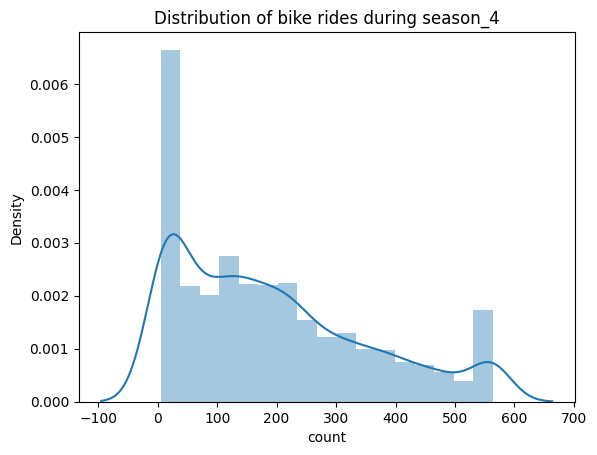

In [52]:
# Distribution of number of bikes rented during season 4
sns.distplot(season_4)
plt.title("Distribution of bike rides during season_4")
plt.show()

Observation: Distribution of bike rides during all 4 seasons seem to be right skewed

In [53]:
print("Skewness of season_1:",season_1.skew())
print("Skewness of season_2:",season_2.skew())
print("Skewness of season_3:",season_3.skew())
print("Skewness of season_4:",season_4.skew())

Skewness of season_1: 1.6642455845120148
Skewness of season_2: 0.6617930872787819
Skewness of season_3: 0.49543375143137586
Skewness of season_4: 0.758982932008488


In [54]:
print("Kurtosis of season_1:",season_1.kurt())
print("Kurtosis of season_2:",season_2.kurt())
print("Kurtosis of season_3:",season_3.kurt())
print("Kurtosis of season_4:",season_4.kurt())

Kurtosis of season_1: 2.767843608604467
Kurtosis of season_2: -0.6658039130331308
Kurtosis of season_3: -0.8544257474126695
Kurtosis of season_4: -0.37327715780077897


We shall use Q-Q plot to check for normality

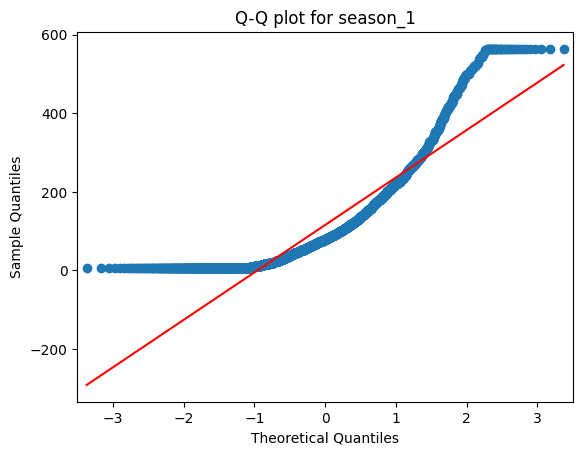

In [55]:
qqplot(season_1, line="s")
plt.title("Q-Q plot for season_1")
plt.show()

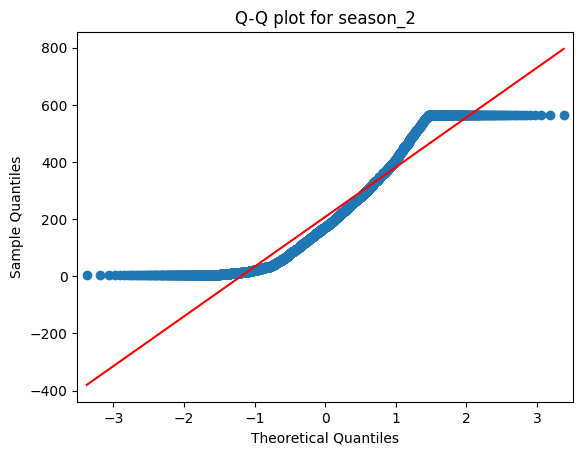

In [56]:
qqplot(season_2, line="s")
plt.title("Q-Q plot for season_2")
plt.show()

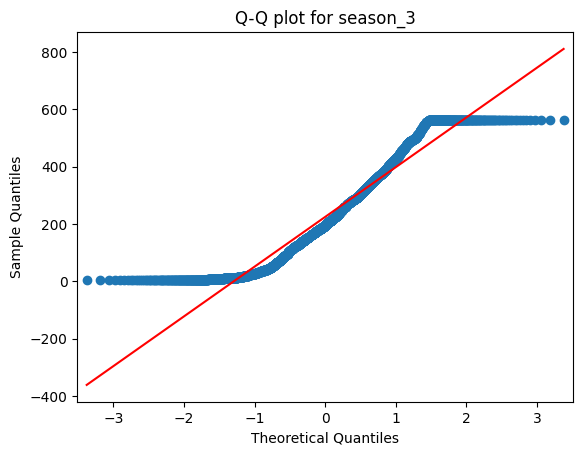

In [57]:
qqplot(season_3, line="s")
plt.title("Q-Q plot for season_3")
plt.show()

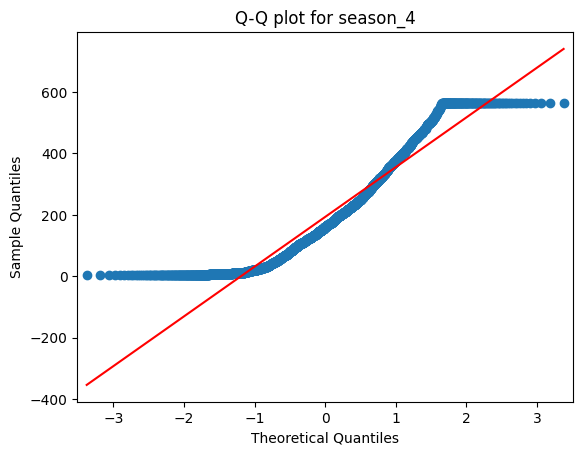

In [58]:
qqplot(season_4, line="s")
plt.title("Q-Q plot for season_4")
plt.show()

Observation: Number of bike rides during all 4 seasons seem to be not normally distributed

We shall perform Shapiro-Wilk's test to verify the normality of the groups

In [59]:
# For season 1

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(season_1)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 0.0
Reject H0
Data is not Gaussian


In [60]:
# For season 2

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(season_2)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 1.898688093068293e-38
Reject H0
Data is not Gaussian


In [61]:
# For season 3

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(season_3)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 4.392293760948129e-35
Reject H0
Data is not Gaussian


In [62]:
# For season 4

# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(season_4)
print("p_value=",p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

p_value= 1.2844254640372872e-37
Reject H0
Data is not Gaussian


Observation: Normality test fails for all 4 seasons

2) Equality of variance

We shall perform Levene's test to check for equality of variance

In [63]:
# H0: The variances between the groups are equal
# Ha: The variances between the groups are different
test_stat, p_value = levene(season_1, season_2,season_3,season_4)

print("p_value=", p_value)

# 95% Confidence level
alpha = 0.05

if p_value < alpha:
 print('Reject H0')
 print('The variances between the groups are different')
else:
 print('Fail to reject H0')
 print('The variances between the groups are same')

p_value= 3.684749131629985e-132
Reject H0
The variances between the groups are different


Since, the assumptions of ANOVA failed, we shall apply Kruskal-Wallis test

Null and Alternate Hypothesis

H0 : The medians of the number of bikes rented are the same for all four seasons

Ha : At least one of the medians of the number of bikes rented is different among the four seasons


Performing Kruskal-Wallis test

In [64]:
test_stat, p_value = kruskal(season_1, season_2, season_3,season_4)

print(f"p_value={p_value}\n")

alpha = 0.05 # Significance level

if p_value < alpha:
   print("Reject H0.")
   print("At least one of the medians of the number of bikes rented is different among the four seasons.")
else:
   print("Fail to reject H0.")
   print("The medians of the number of bikes rented are the same for all four seasons.")

p_value=2.4688288437668016e-149

Reject H0.
At least one of the medians of the number of bikes rented is different among the four seasons.


Since, there is a significant difference among the number of bikes rented, we shall perform pairwise t-test for each pair of seasons  (season_1 vs season_2, season_2 vs season_3, season_3 vs season_4,season_2 vs season_4, season_1 vs season_3,season_1 vs season_4)

In [66]:
season_1.mean(),season_2.mean(),season_3.mean(),season_4.mean()

(115.60554728220401,
 207.85848884010244,
 224.66364800585438,
 193.42072055596196)

season_1 vs season_2

H0 : The number of bikes rented during season 1 is not less than number of bikes rented during season 2 (mu1>=mu2)

Ha : The number of bikes rented during season 1 is less than number of bikes rented during season 2 (mu1 < mu2)

In [67]:
# Left tailed independent t-test
t_stat, p_value = ttest_ind(season_1,season_2,alternative="less")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during season 1 is less than number of bikes rented during season 2.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during season 1 is less than number of bikes rented during season 2.")

p_value =1.0612537190436933e-108

Reject the null hypothesis.
The number of bikes rented during season 1 is less than number of bikes rented during season 2.


season_2 vs season_3

H0 : The number of bikes rented during season 2 is not less than number of bikes rented during season 3 (mu1>=mu2)

Ha : The number of bikes rented during season 2 is less than number of bikes rented during season 3 (mu1 < mu2)

In [68]:
# Left tailed independent t-test
t_stat, p_value = ttest_ind(season_2,season_3,alternative="less")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during season 2 is less than number of bikes rented during season 3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during season 2 is less than number of bikes rented during season 3.")

p_value =0.000177982388621888

Reject the null hypothesis.
The number of bikes rented during season 2 is less than number of bikes rented during season 3.


season_3 vs season_4

H0 : The number of bikes rented during season 3 is not greater than number of bikes rented during season 4 (mu1<=mu2)

Ha : The number of bikes rented during season 3 is greater than number of bikes rented during season 4 (mu1>mu2)

In [69]:
# Right tailed independent t-test
t_stat, p_value = ttest_ind(season_3,season_4,alternative="greater")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during season 3 is greater than number of bikes rented during season 4.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during season 3 is greater than number of bikes rented during season 4.")

p_value =3.341060882928093e-12

Reject the null hypothesis.
The number of bikes rented during season 3 is greater than number of bikes rented during season 4.


season_2 vs season_4

H0 : The number of bikes rented during season 2 is not greater than number of bikes rented during season 4 (mu1<=mu2)

Ha : The number of bikes rented during season 2 is greater than number of bikes rented during season 4 (mu1>mu2)

In [70]:
# Right tailed independent t-test
t_stat, p_value = ttest_ind(season_2,season_4,alternative="greater")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during season 2 is greater than number of bikes rented during season 4.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during season 2 is greater than number of bikes rented during season 4.")

p_value =0.0007552059950517106

Reject the null hypothesis.
The number of bikes rented during season 2 is greater than number of bikes rented during season 4.


season_1 vs season_3

H0 : The number of bikes rented during season 1 is not less than number of bikes rented during season 3 (mu1>=mu2)

Ha : The number of bikes rented during season 1 is less than number of bikes rented during season 3 (mu1 < mu2)

In [71]:
# Left tailed independent t-test
t_stat, p_value = ttest_ind(season_1,season_3,alternative="less")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during season 1 is less than number of bikes rented during season 3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during season 1 is less than number of bikes rented during season 3.")

p_value =5.387849538523993e-149

Reject the null hypothesis.
The number of bikes rented during season 1 is less than number of bikes rented during season 3.


season_1 vs season_4

H0 : The number of bikes rented during season 1 is not less than number of bikes rented during season 4 (mu1>=mu2)

Ha : The number of bikes rented during season 1 is less than number of bikes rented during season 4 (mu1 < mu2)

In [72]:
# Left tailed independent t-test
t_stat, p_value = ttest_ind(season_1,season_4,alternative="less")

print(f"p_value ={p_value}\n" )

alpha = 0.05 # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The number of bikes rented during season 1 is less than number of bikes rented during season 4.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence that the number of bikes rented during season 1 is less than number of bikes rented during season 4.")

p_value =2.0544658715493497e-86

Reject the null hypothesis.
The number of bikes rented during season 1 is less than number of bikes rented during season 4.


Observations:
* There is a significant difference among the number of bikes rented during different seasons.
* The number of bikes rented during summer is greater than the number of bikes rented during spring.
* The number of bikes rented during summer is lower than the number of bikes rented during fall.
* The number of bikes rented during fall is greater than the number of bikes rented during winter.
* The number of bikes rented during summer is greater than the number of bikes rented during winter.
* The number of bikes rented during spring is lower than the number of bikes rented during fall.
* The number of bikes rented during spring is lower than the number of bikes rented during winter.
* Based on the above observations, we can conclude that the number of bikes rented is highest during fall and lowest during spring.


Recommendations:
* As the number of bikes rented is lowest during spring, there should be campaigns like 'huge saving days' with low prices and offers to attract more number of commuters.
* Since the number of bikes rented is also low during winter, consider providing more discounts and a complementary free ride after certain number of rides to enhance the rental rate.
* Since the demand for bike rentals is high in fall and summer seasons, number of Yulu zones need to be increased and service hours should be increased to enhance the customer experience.

# To verify if the weather conditions are significantly different during different seasons

We shall use Chi-squared test for independence to verify if the weather condtions and the seasons are associated

Null and Alternate hypothesis:

H0: Weather is independent on the season

Ha: Weather is dependent on the season

Performing Chi-squared test for independence

In [73]:
# Creating a Contingency Table against Weather and Season columns
contingency_table=pd.crosstab(df['weather'],df['season'])
print(contingency_table)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


In [74]:
test_statistic, p_value, dof, expected_values=chi2_contingency(contingency_table)
print(f"p_value = {p_value} \n")

alpha = 0.05 # Significance level

if p_value < alpha:
  print("Reject H0.")
  print("Weather is dependent on the season")

else:
  print("Fail to Reject H0.")
  print("Weather is independent on the season.")

p_value = 1.5499250736864862e-07 

Reject H0.
Weather is dependent on the season


Observation:                                                        
Weather conditions are significantly different during different seasons.

Recommendation:                                                       
Since weather conditions vary across different seasons, season specific operational strategies should be undertaken that align with the prevailing weather conditions and user preferences.

# Conclusions:


*  There is no significant difference in the number of bikes rented on weekdays and weekends.

*  There is a significant difference among the number of bikes rented during different weather conditions.
* The number of bikes rented is highest when the weather is clear and lowest during rainy conditions.

*   There is a significant difference among the number of bikes rented during different seasons.
* The number of bikes rented is highest during fall and lowest during spring.
*   Weather conditions are significantly different during different seasons.


*   Since weather conditions vary across different seasons, season specific operational strategies should be undertaken that align with the prevailing weather conditions and user preferences.


*   During weekdays, lot of people travel to their offices. So more offers, referral programs and loyality points should be offered to these people to maximize the number of bike rides in weekdays. Also, more Yulu zones need to be started especially near metro stations, railway stations, bus stations and tech parks to provide faster connectivity for the commuters.

* Since the difference in bike rides during weekdays and weekends is insignificant, the service hours can be extended throughout the week to accomodate the customers who travel outside the peak hours.
Also, the bikes, maintenance team members and other resources can be evenly distributed throughout the week.

* Since, most number of bikes are rented during clear weather conditions, more discounts and incentives need to be provided to increase the rental rate during this time period.

* During cloudy weather conditions, Yulu bikes should be promoted as the safest and quickest way to reach the destination without the traffic hassle.

* During light rains or thunderstorms, there will be huge demand for autos and cabs and accordingly, prices will be hiked. Consider, providing lower pricing for the rides on areas with better visibilty and low risk of slippery even though the rental rate will be low during this time period.

* As the number of bikes rented is lowest during spring, there should be campaigns like 'huge saving days' with low prices and offers to attract more number of commuters.

* Since the number of bikes rented is also low during winter, consider providing more discounts and a complementary free ride after certain number of rides to enhance the rental rate.

* Since the demand for bike rentals is high in fall and summer seasons, number of Yulu zones need to be increased and service hours should be increased to enhance the customer experience.

